
0: 448x640 12 persons, 804.6ms
Speed: 3.0ms preprocess, 804.6ms inference, 11.6ms postprocess per image at shape (1, 3, 448, 640)


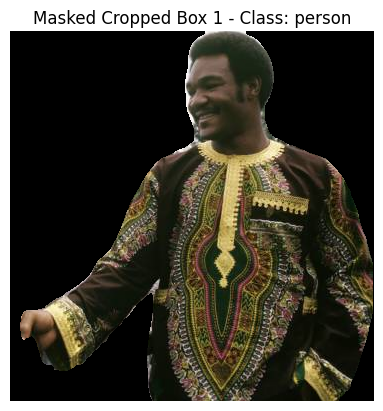

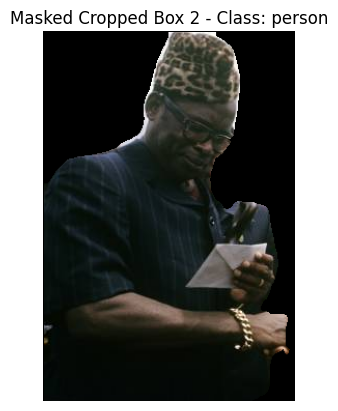

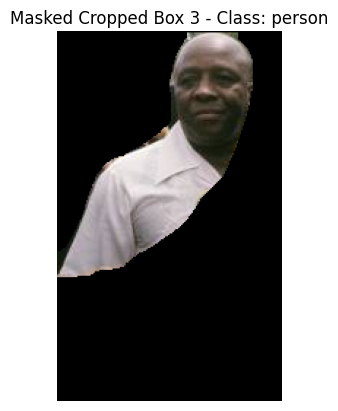

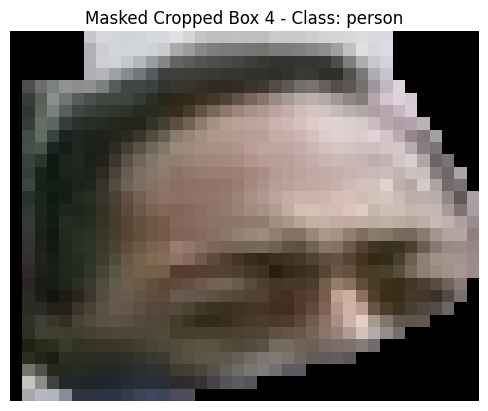

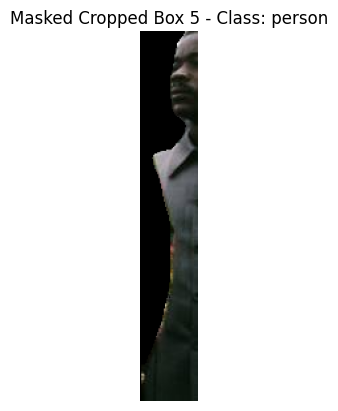

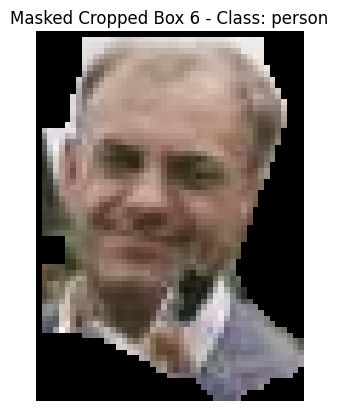

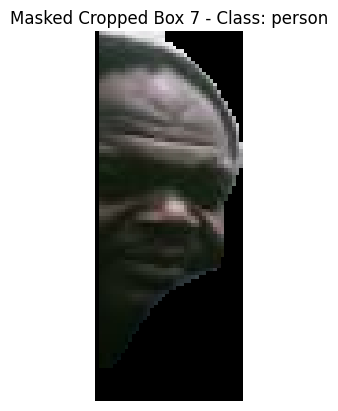

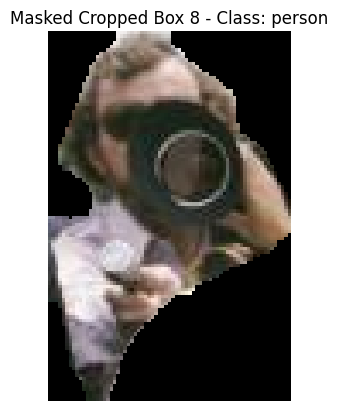

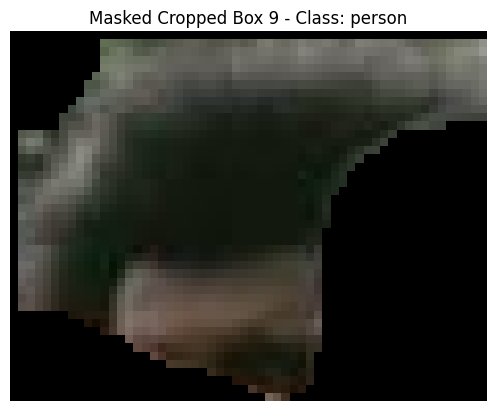

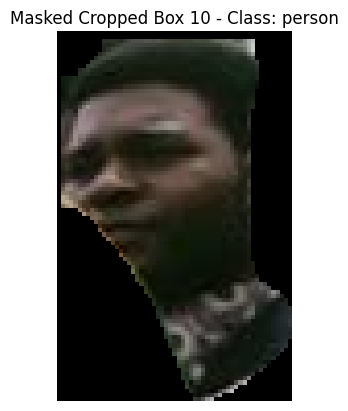

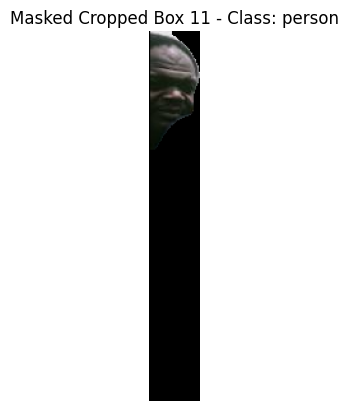

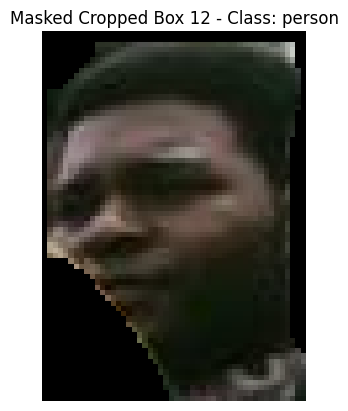


0: 544x640 5 persons, 2 handbags, 1 chair, 930.1ms
Speed: 2.9ms preprocess, 930.1ms inference, 9.3ms postprocess per image at shape (1, 3, 544, 640)


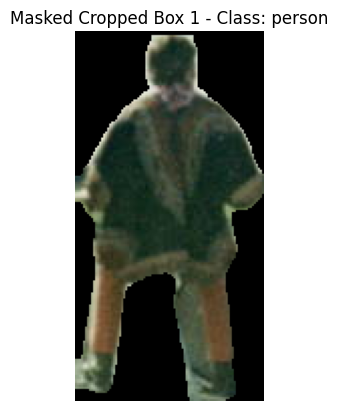

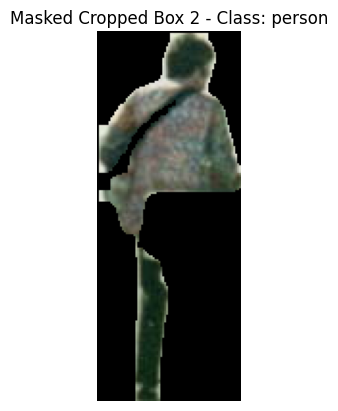

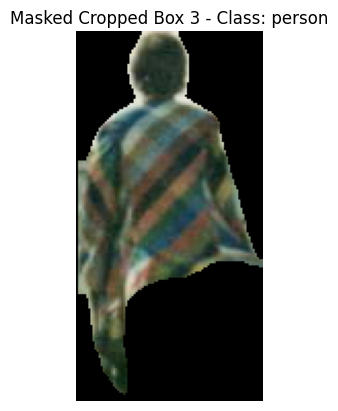

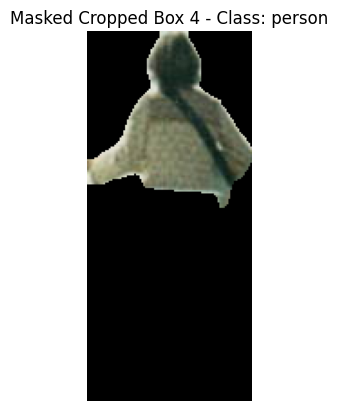

Skipping box 5 as it is not a person.
Skipping box 6 as it is not a person.
Skipping box 7 as it is not a person.


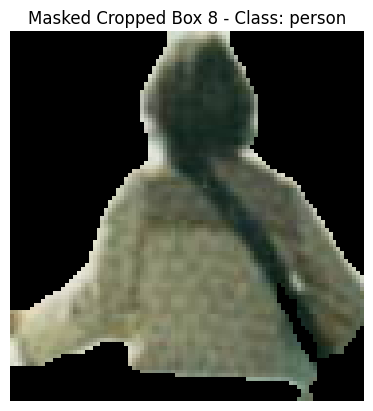


0: 640x512 4 persons, 1 backpack, 1 tie, 1 skateboard, 945.3ms
Speed: 3.1ms preprocess, 945.3ms inference, 7.8ms postprocess per image at shape (1, 3, 640, 512)


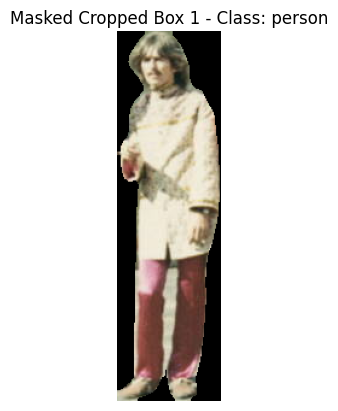

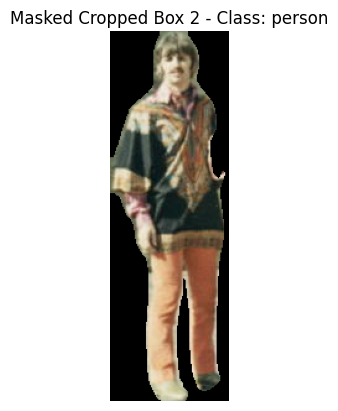

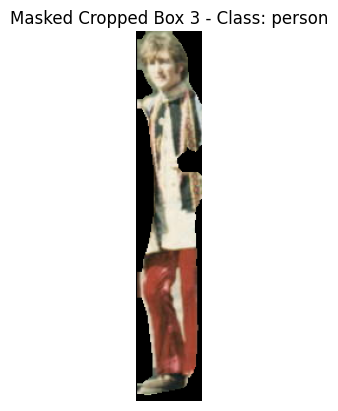

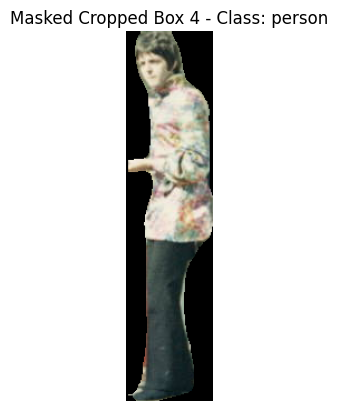

Skipping box 5 as it is not a person.
Skipping box 6 as it is not a person.
Skipping box 7 as it is not a person.

0: 640x480 1 person, 847.0ms
Speed: 2.8ms preprocess, 847.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


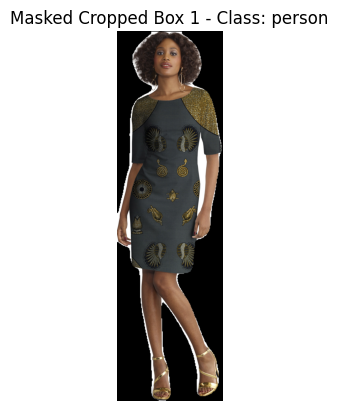

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO

def segment_and_crop_image(image, model, show_images=False):
    # Run inference on a single image
    result = model(image)[0]  # Get the first (and only) result
    cropped_images = []

    # Process result
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for instance segmentation masks
    class_names = result.names  # Class names for the detected objects
    
    if masks is not None:
        for idx, (box, mask) in enumerate(zip(boxes, masks)):
            
            # Get the predicted class name
            class_id = int(box.cls[0])
            class_name = class_names[class_id]

            # Skip if the class is not a person
            if class_name != 'person':
                print(f"Skipping box {idx+1} as it is not a person.")
                continue
            
            # Get coordinates of the bounding box
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            
            # Convert mask to NumPy array and get the mask coordinates
            mask_np = mask.data.squeeze(0).cpu().numpy()
            mask_coords = mask.xy[0]
            
            # Create a blank mask with the same dimensions as the original image
            blank_mask = np.zeros(image.shape[:2], dtype=np.uint8)
            
            # Fill the blank mask with the mask coordinates
            cv2.fillPoly(blank_mask, [mask_coords.astype(np.int32)], 1)
            
            # Apply the mask to the original image
            masked_image = cv2.bitwise_and(image, image, mask=blank_mask)
            
            # Crop the masked image using the bounding box coordinates
            cropped_masked_img = masked_image[y1:y2, x1:x2]
            cropped_images.append(cropped_masked_img)
            
            if show_images:
                # Display the masked cropped image with the class name in the title
                plt.imshow(cv2.cvtColor(cropped_masked_img, cv2.COLOR_BGR2RGB))
                plt.title(f'Masked Cropped Box {idx+1} - Class: {class_name}')
                plt.axis('off')
                plt.show()
    else:
        print("No masks detected.")
    
    return cropped_images

# Example usage:
model = YOLO("yolov8l-seg.pt")
images = [cv2.imread("../data/X.jpg"), cv2.imread("../data/Y.jpg"), cv2.imread("../data/YY.jpg"), cv2.imread("../data/Z.jp2")]
cropped_images = []
for image in images:
    cropped_images.extend(segment_and_crop_image(image, model, show_images=True))

In [7]:
print(f"Number of cropped images: {len(cropped_images)}")

Number of cropped images: 22
